In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Check for outliers
from scipy.stats import zscore

#Data Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
#We will first import the data into a Pandas dataframe and inspect its properties
df=pd.read_csv('Automobile_insurance_fraud.csv',parse_dates=['policy_bind_date', 'incident_date'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# So now the data is in rectangular form with 1000 entries each having 40 distinct properties
df.shape

(1000, 40)

In [4]:
# Let's list all the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [6]:
# We now describe the properties of dataframe like columns datatype etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Finding:
    1. 1000 row with 40 features in this dataset.
    2. 19 features are object type and 17 features int type and 2 are flot type.
    3. Missing value present in _c39 features and some others features also but here show in _c39 fetures.
    4. In -c39 fetures all value is null so its drop during cleansing the data.
    5. in some other features not show null value beauce in the place of null value ? sign place.

In [7]:
#To check missing value
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

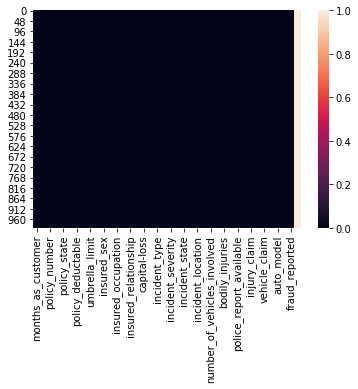

In [8]:
sns.heatmap(df.isnull())

In [9]:
#replce the ? sign with NaN
df=df.replace('?',np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [10]:
# After replace ? with nan than check all features null value
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

finding:
    1. Missing value present in 4 features.
    2. Missing value present in collision_type,number_of_vehicles_involved,police_report_available and _c39.

In [11]:
# Drop _c39 feature beause all value is null 
df.drop(columns=['_c39'],axis=1,inplace=True)

In [12]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [13]:
#Imputing the missing value with mode 

for col in ['collision_type', 'property_damage', 'police_report_available']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# After imputing the missing value check missing value
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

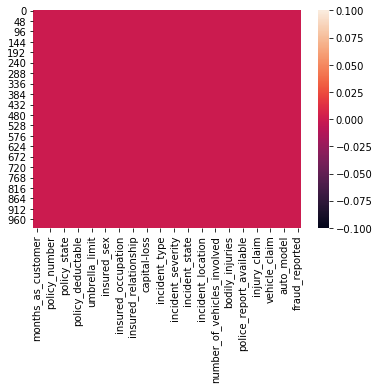

In [15]:
sns.heatmap(df.isnull())
plt.show()

## Statistical Analysis

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observation:
    1. Mean is greater than median in all features exept capital-loss and outliers present in some features mean some features are right skiwed.
    2. capital-loss features contain negative value of mean, median.
    3. umbrella-limit min value is negative.
    4. All numerical fetures check sepretly.

In [17]:
#check correlation
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


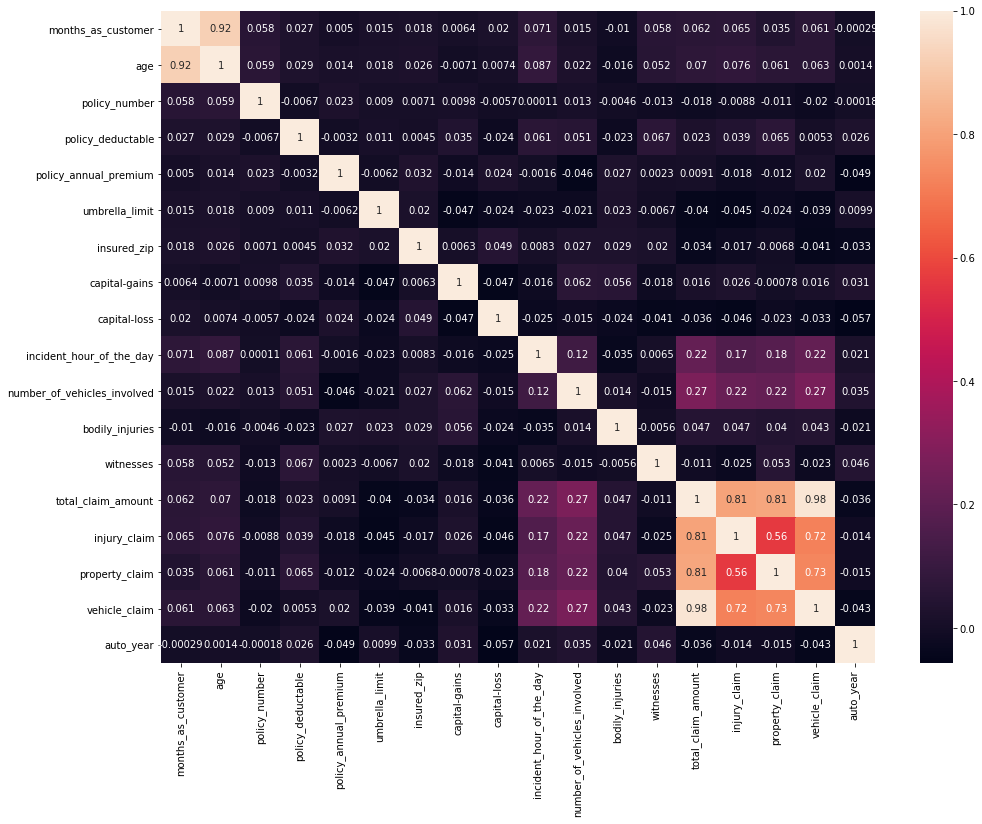

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

Observation:
    1. total_claim_amount,injury_claim,property_claim and vehicle_claim is highly and positively correlated.
    2. months_as_customer and age is also highly and positively correlated.
    3. Least correlation between some other features.

Skewness of total_claim_amount = -0.59
Skewness of injury_claim = 0.26
Skewness of property_claim = 0.38
Skewness of vehicle_claim = -0.62


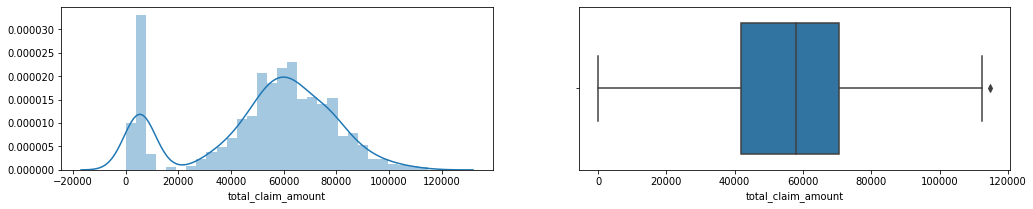

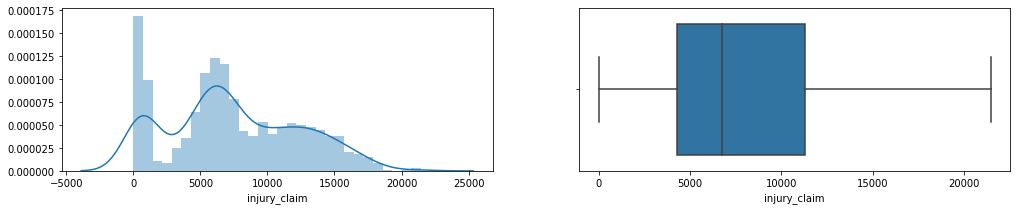

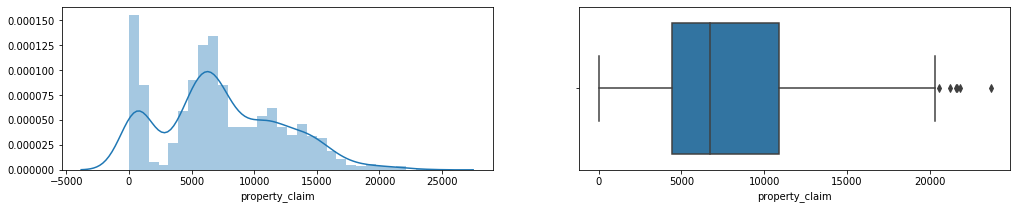

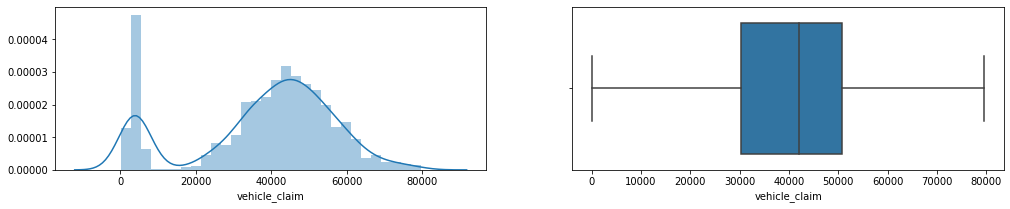

In [19]:
#Univariate analysis 'total_claim_amount', 'injury_claim' , 'property_claim' and 'vehicle_claim'
for i in ['total_claim_amount','injury_claim','property_claim','vehicle_claim']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

Observation:
    1. Outliers present in property_claim.
    2. total_claim_amount and vehicle_claim is skewed to the left.
    3. Will apply log10 to rectify skewness after analysis.

Skewness of months_as_customer = 0.36
Skewness of age = 0.48


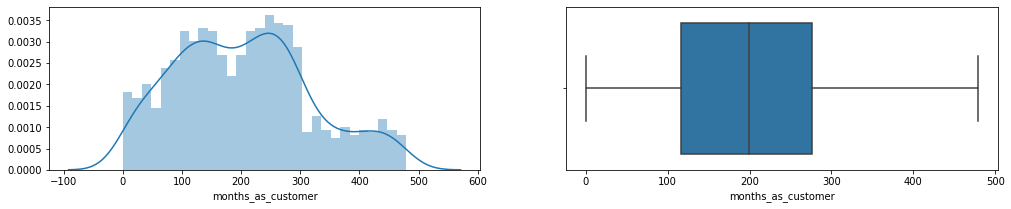

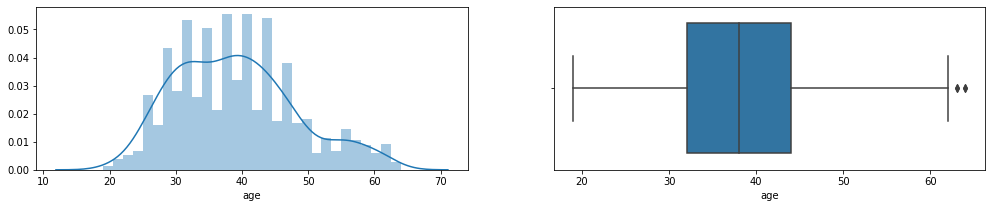

In [20]:
# Univariate analysis of 'months_as_customer' and 'age'
for i in ['months_as_customer','age']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

Observation:
    1. No outliers.
    2. months_as_customer and age distribtion like normal.

## Exploring the data variable

In [21]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

months_as_customer
# of unique values --> 391
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
age
# of unique values --> 46
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
policy_number
# of unique values --> 1000
count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
policy_bind_date
# of unique values --> 951
co

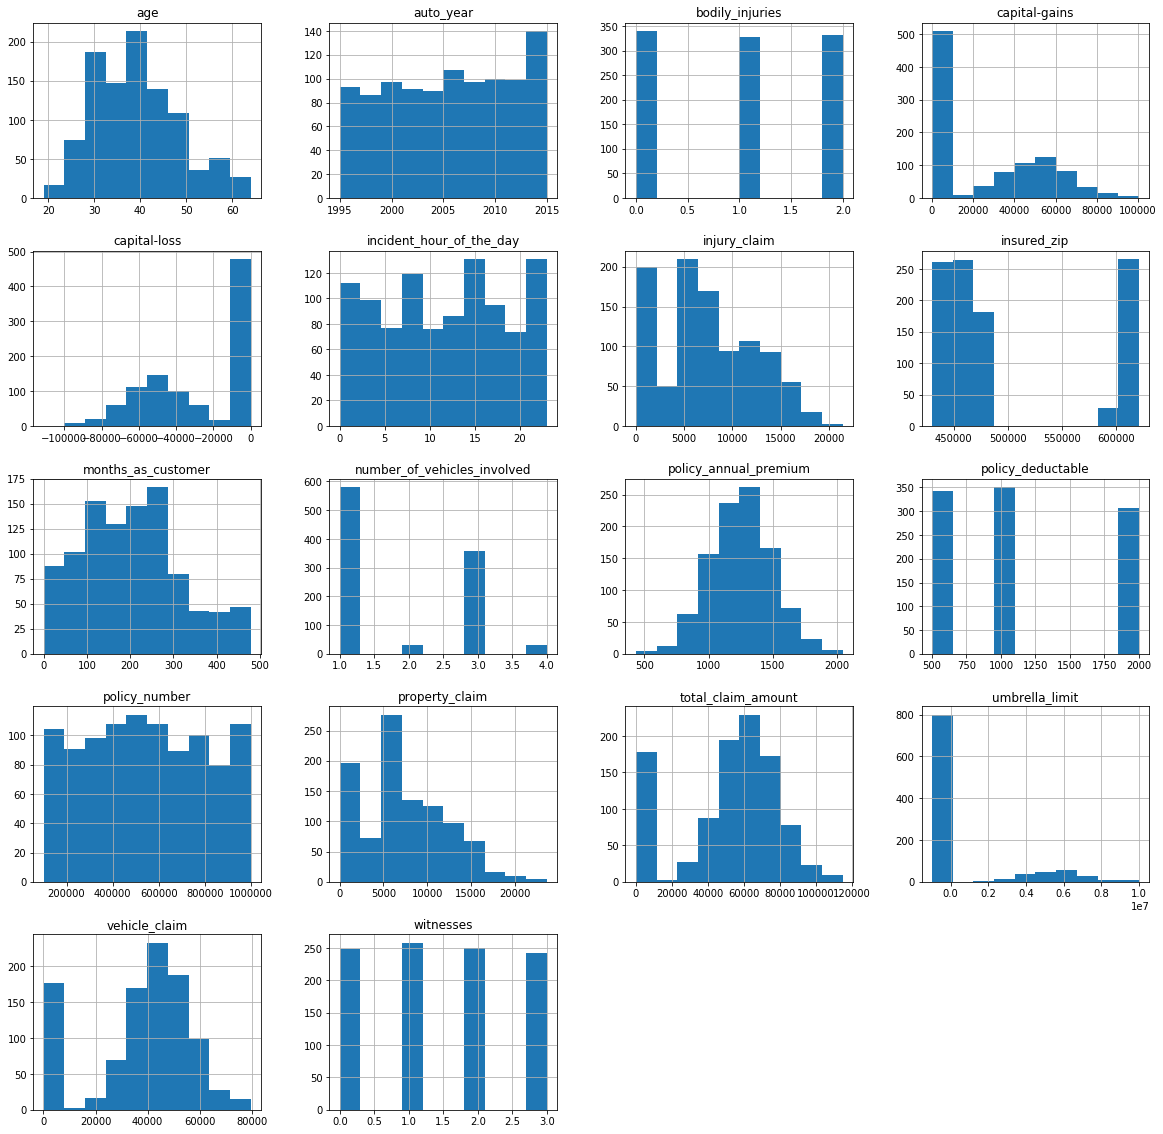

In [22]:
df.hist(figsize=(20,20))
plt.show()

Observation:
    1. Age distribution is a slightly right-skewed normal distribution between 30 and 40 years old.
    2. Policy Number is likely to be a unique identifier for policy given the feature's quasi-uniform distribution.
    3. Some features are constant values for all policy. They're likely to be redundant features.
    4. Some features likely to be a unique identifier.

In [23]:
df.drop(columns=['policy_number','policy_bind_date','policy_annual_premium','insured_zip','incident_location'], axis=1, inplace=True)

In [24]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Data visualization

In [25]:
df['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)

0    753
1    247
Name: fraud_reported, dtype: int64


Text(0.5, 1.0, 'fraud_reported')

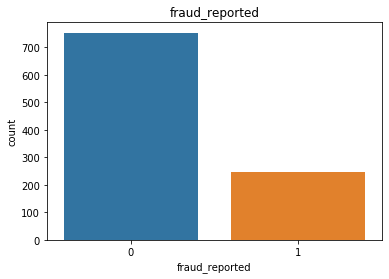

In [26]:
#Start with Target Variable: fraud_reported
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'])
plt.title('fraud_reported')

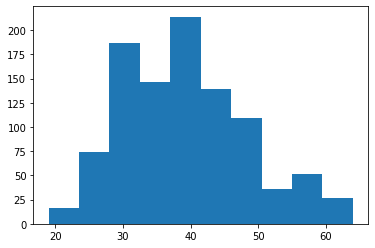

In [27]:
# Lets draw histogram for Age 
plt.hist(x='age',bins=10,data=df)
plt.show()

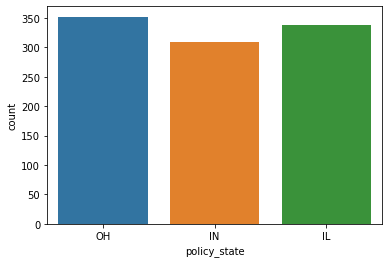

In [28]:
#Univariate analysis of categorical features
sns.countplot(df['policy_state'])

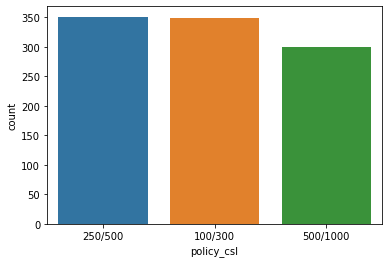

In [29]:
sns.countplot(df['policy_csl'])

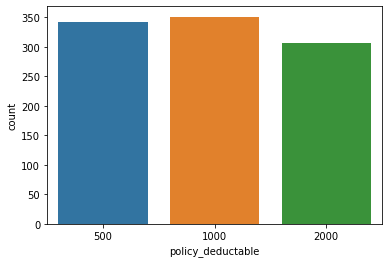

In [30]:
sns.countplot(df['policy_deductable'])

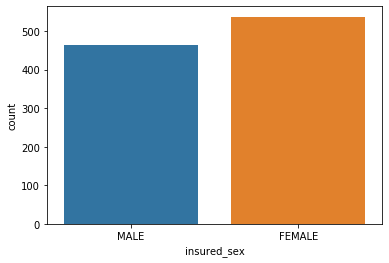

In [31]:
sns.countplot(df['insured_sex'])

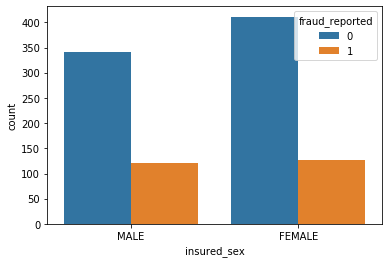

In [32]:
#Gender Vs fraud_reported
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

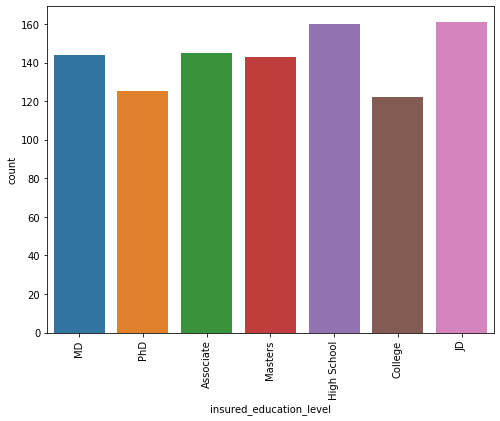

In [33]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_education_level'])

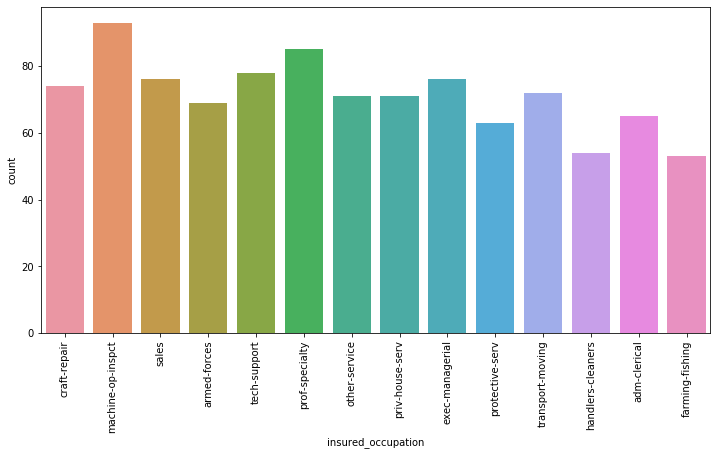

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_occupation'])

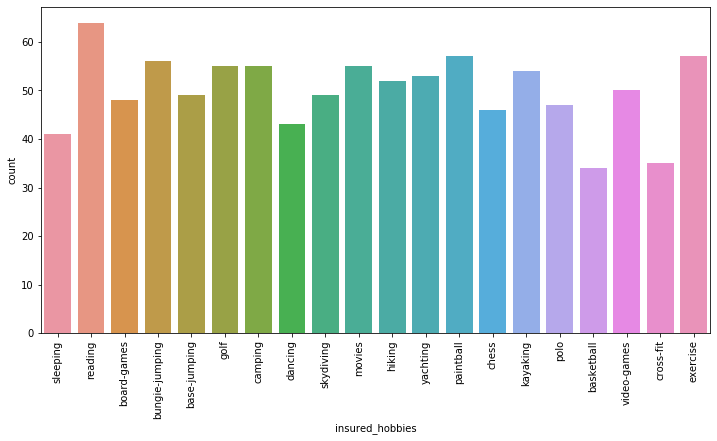

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df['insured_hobbies'])

### Data Cleaning - insured_relationship

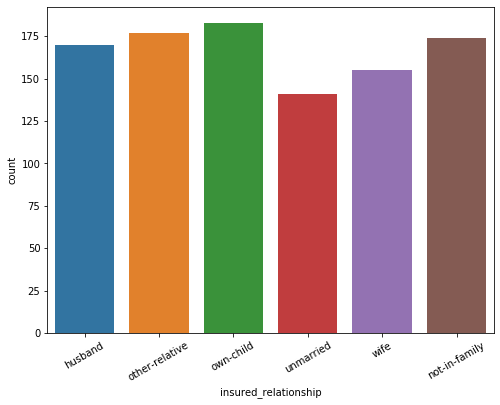

In [36]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
sns.countplot(df['insured_relationship'])

In [37]:
df['insured_relationship'].replace({'husband':'Married','wife':'Married','own-child':'Married'},inplace=True)
df['insured_relationship'].value_counts()

Married           508
other-relative    177
not-in-family     174
unmarried         141
Name: insured_relationship, dtype: int64

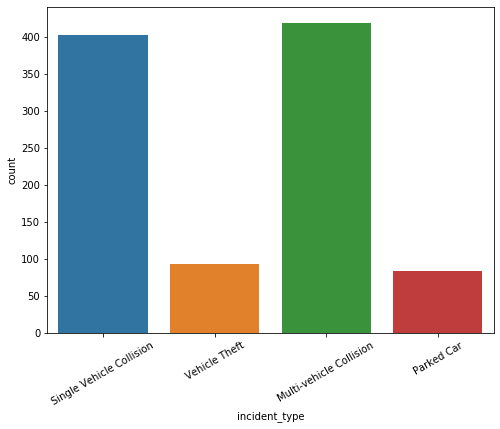

In [38]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
sns.countplot(df['incident_type'])

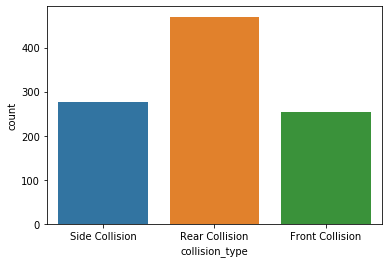

In [39]:
sns.countplot(df['collision_type'])

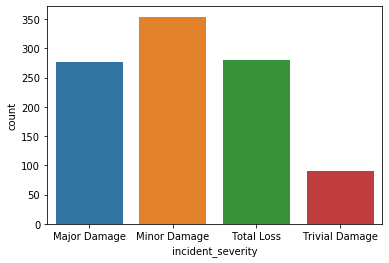

In [40]:
sns.countplot(df['incident_severity'])

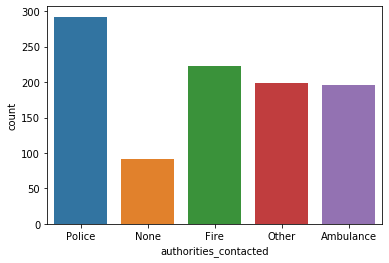

In [41]:
sns.countplot(df['authorities_contacted'])

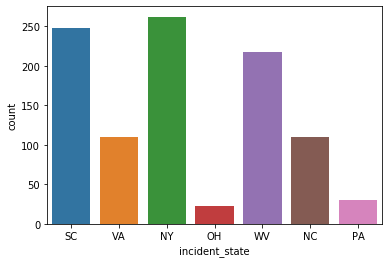

In [42]:
sns.countplot(df['incident_state'])

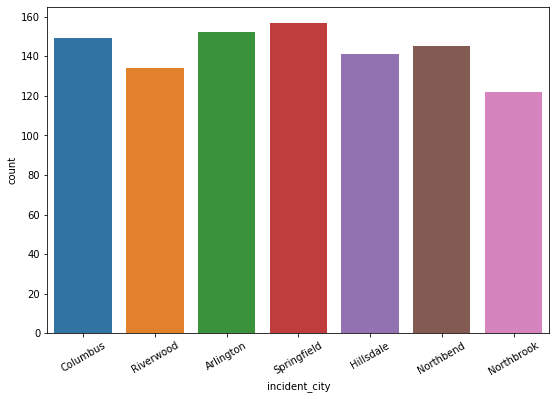

In [43]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=30)
sns.countplot(df['incident_city'])

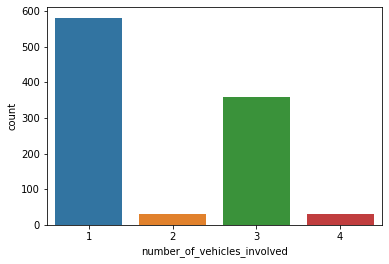

In [44]:
sns.countplot(df['number_of_vehicles_involved'])

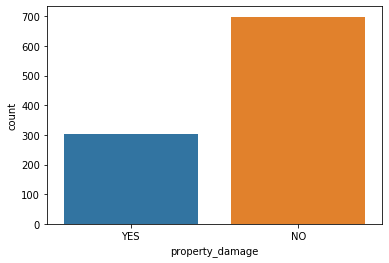

In [45]:
sns.countplot(df['property_damage'])

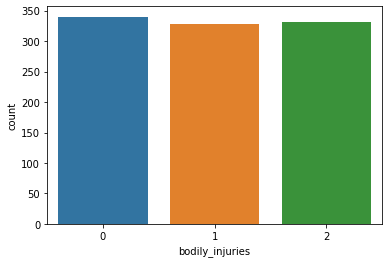

In [46]:
sns.countplot(df['bodily_injuries'])

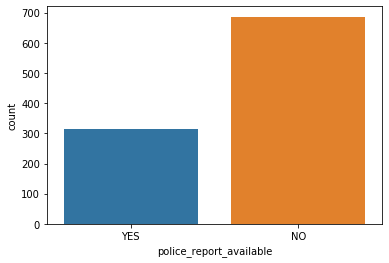

In [47]:
sns.countplot(df['police_report_available'])

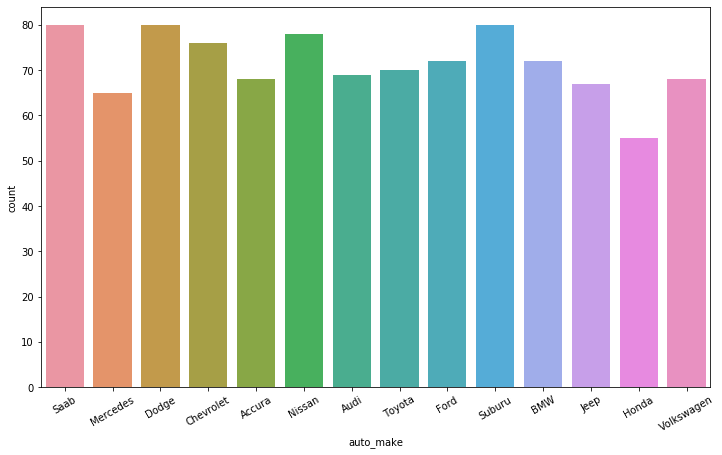

In [48]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=30)
sns.countplot(df['auto_make'])

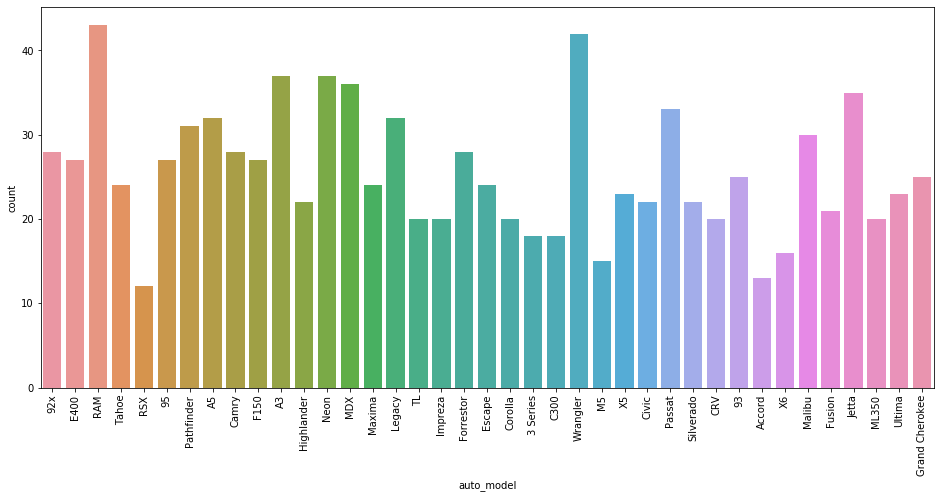

In [49]:
#Univariate analysis 'model_year'
plt .figure(figsize=(16,7))
plt.xticks(rotation=90)
sns.countplot(df['auto_model'])

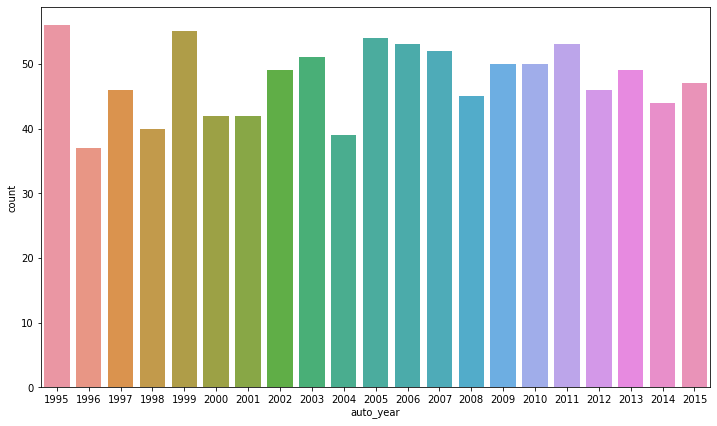

In [50]:
#Univariate analysis 'model_year'
plt.figure(figsize=(12,7))
sns.countplot(df['auto_year'])

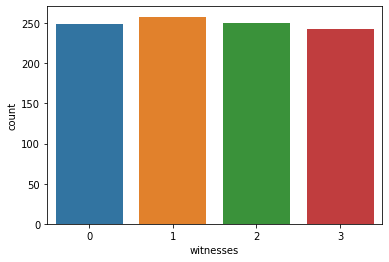

In [51]:
#Univariate analysis 'witness'
sns.countplot(df['witnesses'])

### Bivariate analysis

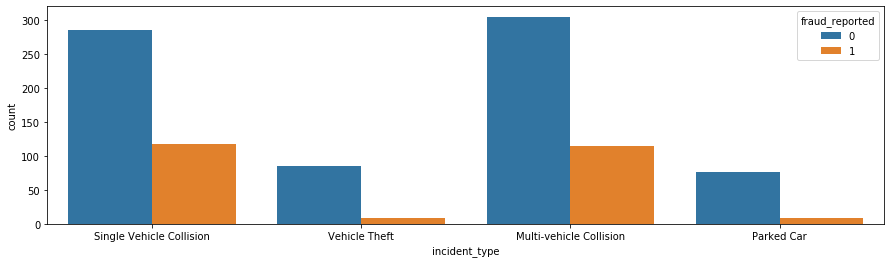

In [52]:
plt.figure(figsize=(15,4))
sns.countplot(x='incident_type', data=df,hue='fraud_reported')

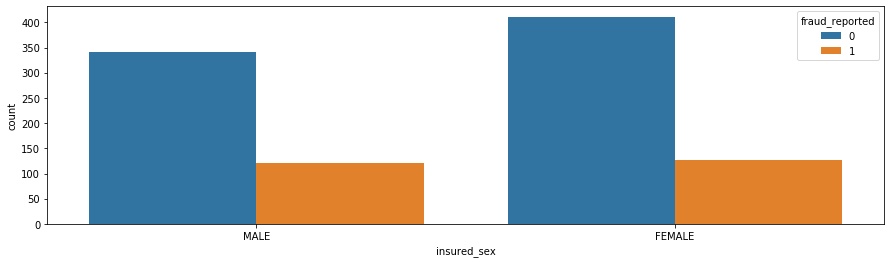

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(x='insured_sex', data=df,hue='fraud_reported')

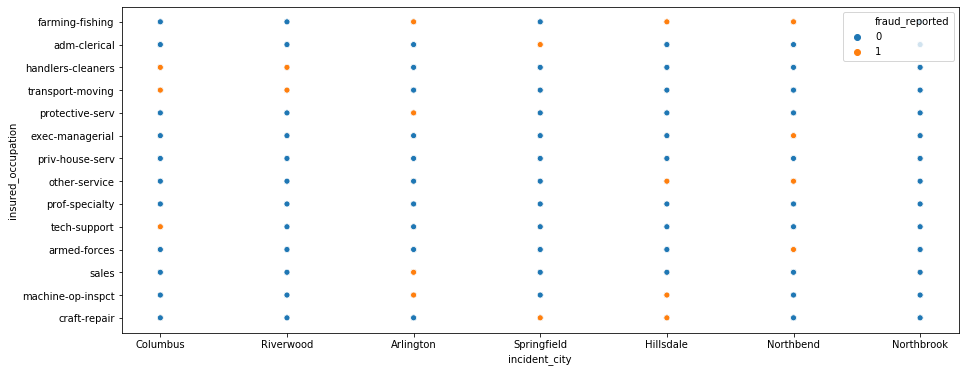

In [54]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='insured_occupation',hue='fraud_reported',data=df)

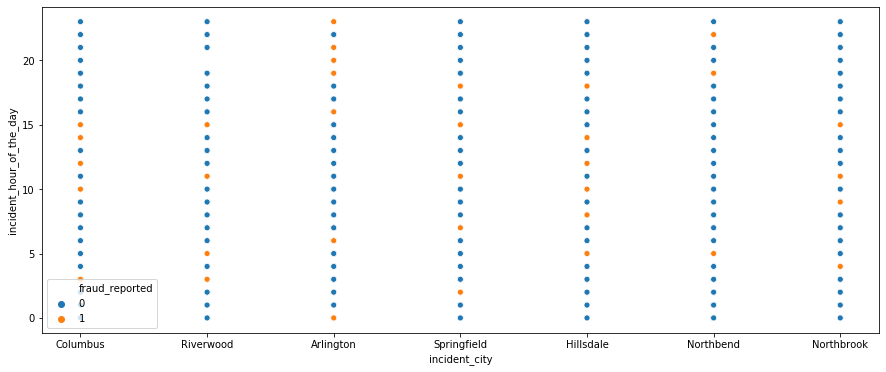

In [55]:

plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='incident_hour_of_the_day',hue='fraud_reported',data=df)

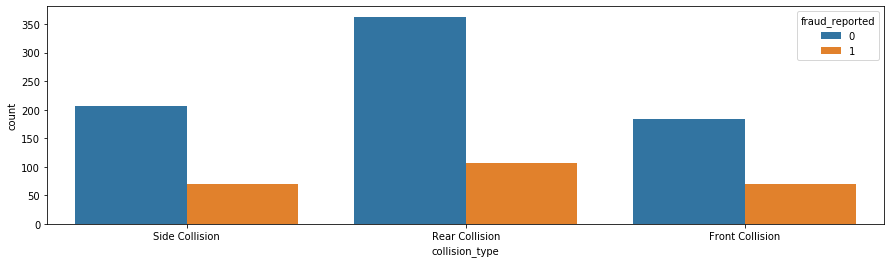

In [56]:
plt.figure(figsize=(15,4))
sns.countplot(x='collision_type', data=df,hue='fraud_reported')

Text(0, 0.5, '% of Reports')

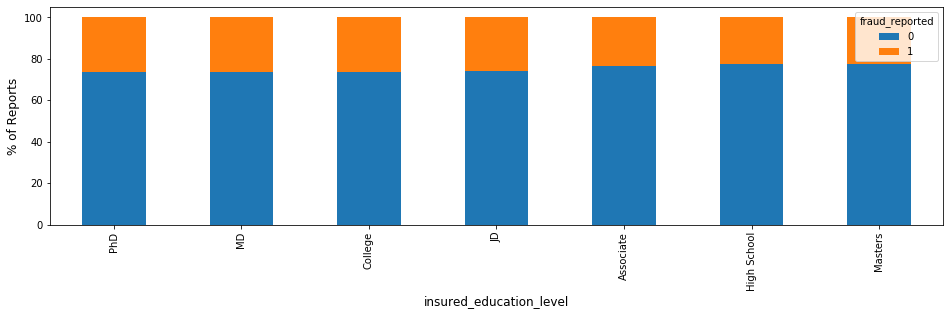

In [57]:
tbl=pd.crosstab(df['insured_education_level'], df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('insured_education_level',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

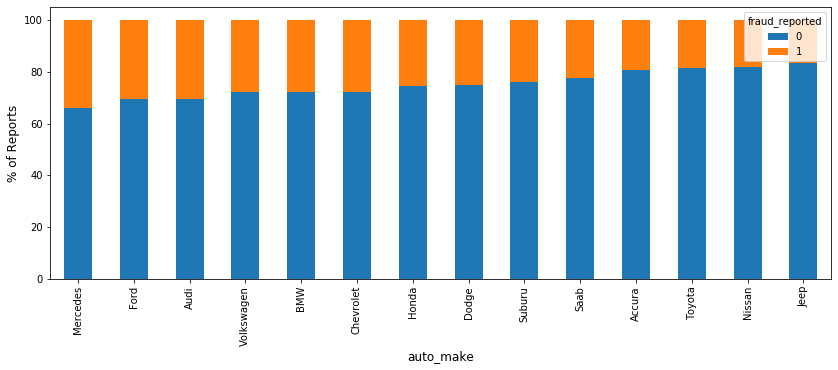

In [58]:
tbl=pd.crosstab(df['auto_make'], df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('auto_make',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

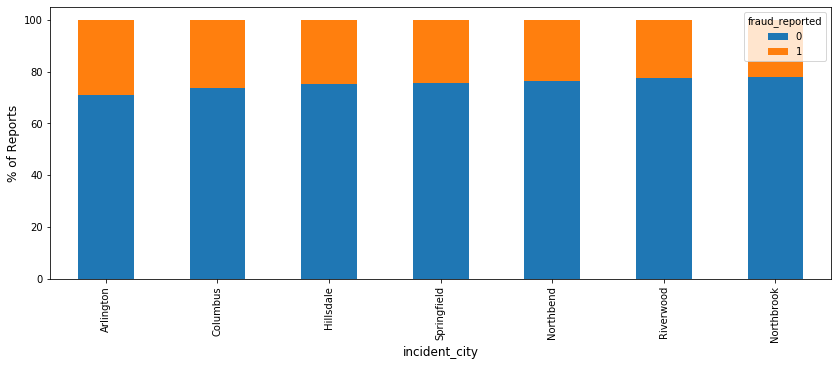

In [59]:

tbl=pd.crosstab(df['incident_city'], df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('incident_city',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

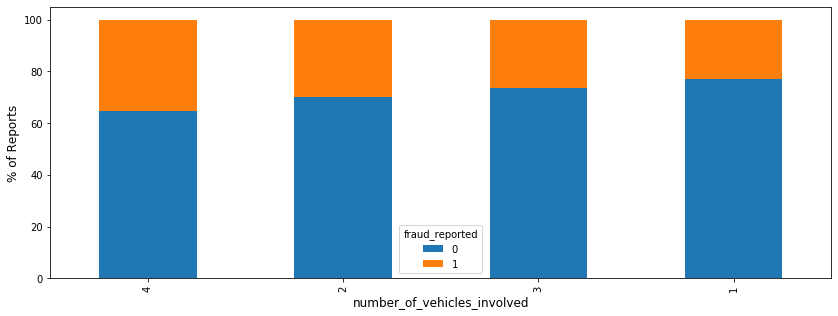

In [60]:

tbl=pd.crosstab(df['number_of_vehicles_involved'], df['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('number_of_vehicles_involved',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

## Check skewness

In [61]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

Reamrk:
     If we remove skewness then some of the rows in umbrella_limit columns are become NaN therefore when we are going to remove outliers then all the rows of redshift columns become NaN when we find out zscore. So when we remove outliers then all rows are removed and no rows are present in our dataset. For that reason we are not going to remove oultiers via zscore if we remove skewness

In [62]:
df.drop(columns=['incident_date'],axis=1,inplace=True)

In [63]:
#seprate the categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model'] 
num_df >>> 
 ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


## Removing outliers

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[1.07813958, 0.99083647, 0.22238259, ..., 0.74965272, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 1.41278352, ..., 1.82334593, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 1.41278352, ..., 0.78556451, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.03996564, ..., 0.77190224, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 1.41278352, ..., 0.07357971, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.22238259, ..., 1.81434017, 0.31549088,
        0.57273139]])

In [65]:
#consider threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
       807, 875, 922, 975], dtype=int64), array([ 3,  3,  3,  3,  3,  3,  3,  3,  3, 12,  3,  3,  3,  5,  3,  3,  3],
      dtype=int64))


In [66]:
df=df[(z<3).all(axis=1)]

In [67]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,0,FEMALE,Masters,craft-repair,paintball,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,IL,100/300,1000,0,FEMALE,PhD,prof-specialty,sleeping,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,OH,250/500,500,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,IL,500/1000,2000,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [68]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [69]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,297,29,2,1,1,1,1,4,2,17,...,2,1,559,257,510,541,10,1,9,1
1,211,23,1,1,2,5,1,4,6,15,...,0,0,44,46,45,38,8,12,12,1
2,122,10,2,0,2,5,0,6,11,2,...,3,0,142,335,103,115,4,30,12,0
3,237,22,0,1,2,6,0,6,1,2,...,2,0,449,244,247,518,3,34,19,1
4,211,25,0,2,1,6,1,0,11,2,...,1,0,81,69,36,66,0,31,14,0


In [70]:
#Splitting the data into input and output variable.
x=df.drop(columns=['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,297,29,2,1,1,1,1,4,2,17,...,1,2,1,559,257,510,541,10,1,9
1,211,23,1,1,2,5,1,4,6,15,...,0,0,0,44,46,45,38,8,12,12
2,122,10,2,0,2,5,0,6,11,2,...,2,3,0,142,335,103,115,4,30,12
3,237,22,0,1,2,6,0,6,1,2,...,1,2,0,449,244,247,518,3,34,19
4,211,25,0,2,1,6,1,0,11,2,...,0,1,0,81,69,36,66,0,31,14


In [71]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [72]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(983, 32) 		 (983,)


In [73]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [74]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [75]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(786, 32) 		 (197, 32)


In [76]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(786,) 	 (197,)


In [77]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [78]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 14}

In [79]:
KNN=KNeighborsClassifier(n_neighbors=14)

In [80]:
#Support Vector Classifier
from sklearn.svm import SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'linear'}

In [81]:
SV=SVC(kernel='linear',C=1)

In [82]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'gini'}

In [83]:
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)

In [84]:
#Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [85]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [86]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [87]:
#Extra Trees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [88]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [89]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [90]:
LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=14)
SV=SVC(kernel='linear',C=1)
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [91]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ LogisticRegression **********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.7766497461928934


Cross_Val_Score= 0.7730983302411873


roc_auc_score= 0.6334591722595079


classification_report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       149
           1       0.57      0.35      0.44        48

    accuracy                           0.78       197
   macro avg       0.69      0.63      0.65       197
weighted avg       0.75      0.78      0.76       197



[[136  13]
 [ 31  17]]





************ GaussianNB **********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.751269035532995


Cross_Val_Score=

Cross_Val_Score= 0.8373222016079159


roc_auc_score= 0.828369686800895


classification_report
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.69      0.77      0.73        48

    accuracy                           0.86       197
   macro avg       0.80      0.83      0.81       197
weighted avg       0.87      0.86      0.86       197



[[132  17]
 [ 11  37]]







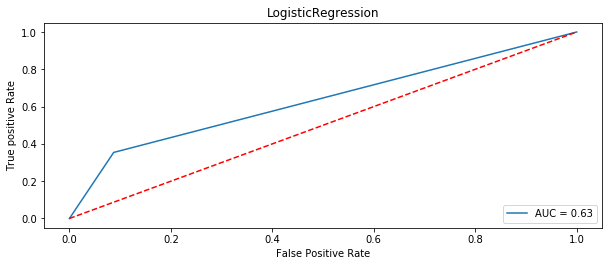

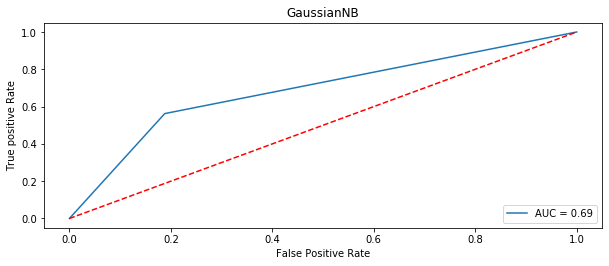

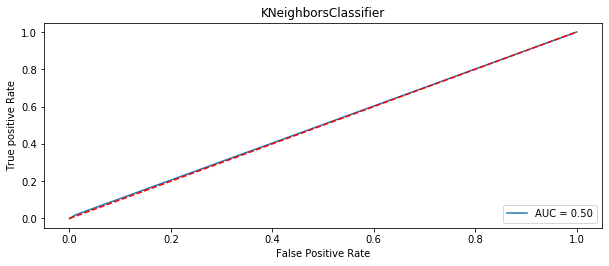

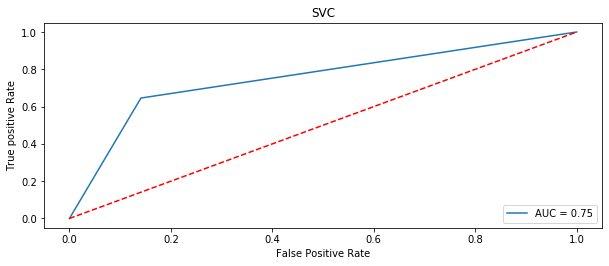

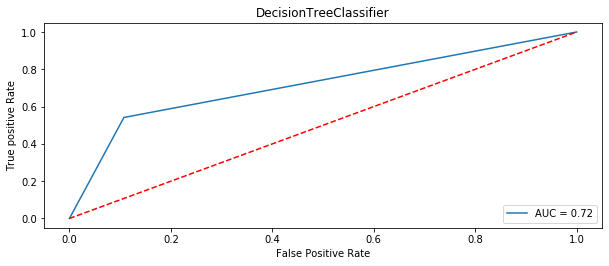

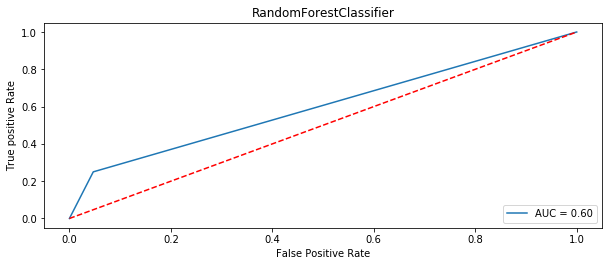

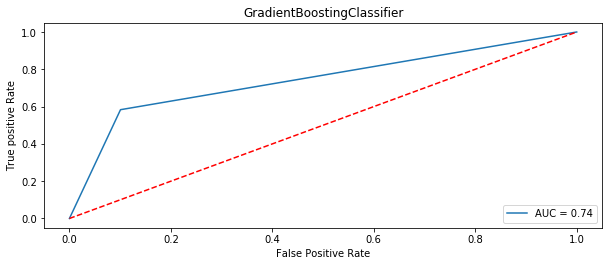

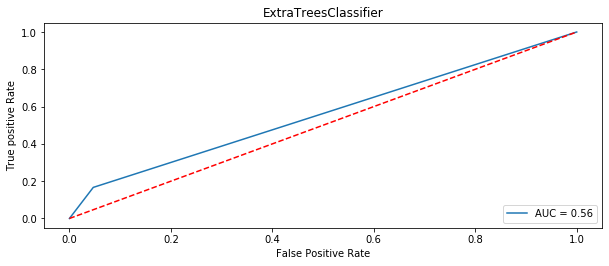

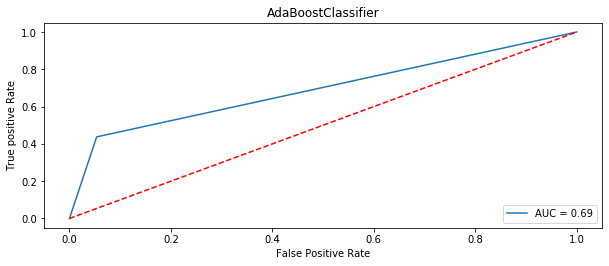

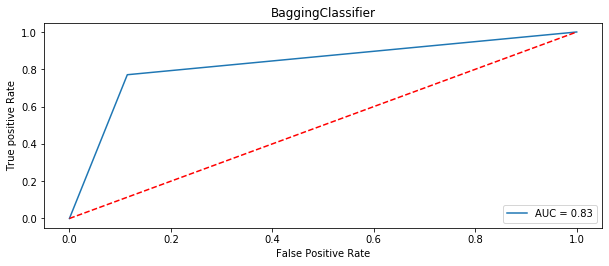

In [93]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [94]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,77.664975,77.309833,63.345917
1,GaussianNB,75.126904,74.157906,68.729027
2,KNeighborsClassifier,75.126904,75.176252,50.370526
3,SVC,80.710660,79.146568,75.244687
4,DecisionTreeClassifier,80.710660,77.725211,71.714206
5,RandomForestClassifier,78.172589,77.926201,60.151007
6,GradientBoostingClassifier,82.233503,82.709751,74.133110
7,ExtraTreesClassifier,76.142132,75.986395,55.984340
8,AdaBoostClassifier,82.233503,81.587302,69.190436
9,BaggingClassifier,85.786802,83.732220,82.836969


In [95]:
#save best model

import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(BC,'BC_Automobile_Insurance_Fraud.pkl')

['BC_Automobile_Insurance_Fraud.pkl']